In [29]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
allmales={}
allfemales={}
allmales['all']=pd.read_excel('pinc08_2_1_1.xls', header=9)
allmales['white']=pd.read_excel('pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel('pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel('pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel('pinc08_2_1_8.xls', header=9)
allfemales['all']=pd.read_excel('pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel('pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel('pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel('pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel('pinc08_3_1_8.xls', header=9)

In [40]:
#print males.keys()
print allmales['all'].keys()[0], allmales['all'][allmales['all'].keys()[0]]
print "" 
#print allmales['all'].keys()[2:43]


print ""

Characteristic 0                                                   NaN
1                                             ....Total
2                                              Earnings
3                                    ..Wages and Salary
4                             ..Nonfarm Self-Employment
5                                ..Farm Self-Employment
6                                       Social Security
7                    SSI (Supplemental Security Income)
8                                     Public Assistance
9                                     Veterans Benefits
10                                    Survivor Benefits
11                                  Disability Benefits
12                            Unemployment Compensation
13                                 Workers Compensation
14                                      Property Income
15                                           ..Interest
16                                          ..Dividends
17                ..Rents, Royalt

   status: 2
  success: False
     njev: 3
     nfev: 21
 hess_inv: array([[1]])
      fun: 37359200.01247517
        x: array([ 0.5938435])
  message: 'Desired error not necessarily achieved due to precision loss.'
      jac: array([ -5.55224179e+08])
      nit: 0
1674.6926881


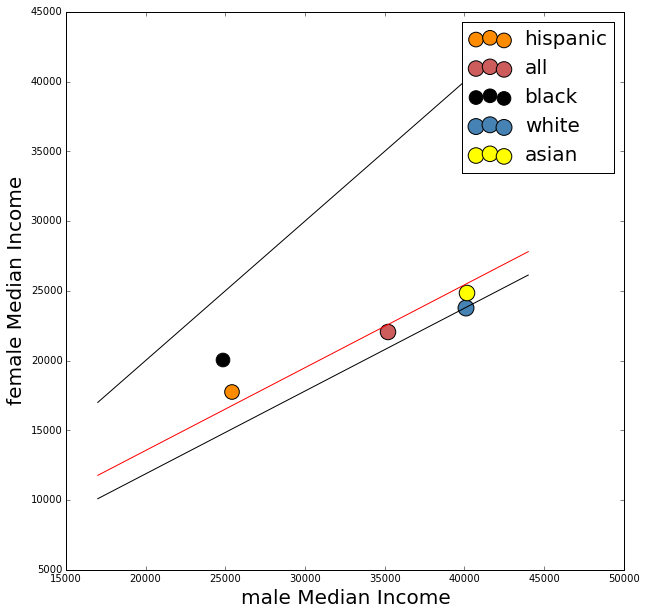

In [4]:
from scipy.optimize import minimize
pl.figure(figsize=(10,10))
all_males=np.array([0.,allmales['all']['Median income'][1],allmales['white']['Median income'][1],allmales['black']['Median income'][1],allmales['hispanic']['Median income'][1],allmales['asian']['Median income'][1]])
all_females=np.array([0.,allfemales['all']['Median income'][1],allfemales['white']['Median income'][1],allfemales['black']['Median income'][1],allfemales['hispanic']['Median income'][1],allfemales['asian']['Median income'][1]])
col={'all':'IndianRed','white':'SteelBlue','black':'black','hispanic':'DarkOrange','asian':'yellow'}
for k in col.iterkeys():
    pl.scatter(allmales[k]['Median income'][1],allfemales[k]['Median income'][1],s=150*allmales[k]['Median income'][1]/allfemales[k]['Median income'][1],c=col[k],label=k)
pl.plot([17000,42000],[17000,42000],'k-')
pl.legend(fontsize=20)
pl.xlabel('male Median Income',fontsize=20)
pl.ylabel('female Median Income',fontsize=20)

m,b = np.polyfit(all_males, all_females, 1) 
stline = lambda a,x,y: sum((a*x-y)**2)
result = minimize(stline, m, args=(all_males, all_females))
print result
print b
pl.plot(range(17000,45000,1000),result.x*np.arange(17000,45000,1000),'k')
pl.plot(range(17000,45000,1000),b+m*np.arange(17000,45000,1000),'r')


In [78]:
M=(allmales['all'].transpose())[(allmales['all'].transpose()).keys()[1]][2:41]
MW=(allmales['white'].transpose())[(allmales['white'].transpose()).keys()[1]][2:41]
MB=(allmales['black'].transpose())[(allmales['black'].transpose()).keys()[1]][2:41]
MH=(allmales['hispanic'].transpose())[(allmales['hispanic'].transpose()).keys()[1]][2:41]
MA=(allmales['asian'].transpose())[(allmales['asian'].transpose()).keys()[1]][2:41]


F=(allfemales['all'].transpose())[(allfemales['all'].transpose()).keys()[1]][2:41]
FW=(allfemales['white'].transpose())[(allfemales['white'].transpose()).keys()[1]][2:41]
FB=(allfemales['black'].transpose())[(allfemales['black'].transpose()).keys()[1]][2:41]
FH=(allfemales['hispanic'].transpose())[(allfemales['hispanic'].transpose()).keys()[1]][2:41]
FA=(allfemales['asian'].transpose())[(allfemales['asian'].transpose()).keys()[1]][2:41]


In [ ]:
plt.figure(figsize=(6,6))
symbols = ['D', '^']
colors = ['green', 'r', 'k', 'b','yellow']
factor_groups = .groupby(['F','FW','FB','FH','FA'])
for values, group in factor_groups:
    i,j = values
    plt.scatter(group['X'], group['S'], marker=symbols[j], color=colors[i-1],
 

In [60]:
mocs={'males':[], 'females':[]}
for gender in ['males','females']:
    for k in col.iterkeys():    
        for j in allmales[k].keys()[3:42]:
        #for i in range(males[k][1])
            inmin=float(j.split()[0].replace('$','').replace(',',''))
            try:
                inmax=float(j.split()[2].replace('$','').replace(',',''))
                dm=inmax-inmin
                if gender=='males':
                    mocs[gender].append(np.random.rand(allmales[k][j][1])*dm + inmin)
                else:
                    mocs[gender].append(np.random.rand(allfemales[k][j][1])*dm + inmin)

            except ValueError:
                inmax = inmin*2
                dm=(inmax-inmin)/2
                if gender=='males':
                    mocs[gender].append(np.abs(np.random.randn(allmales[k][j][1]))*dm + inmin)
                else:
                    mocs[gender].append(np.abs(np.random.randn(allfemales[k][j][1]))*dm + inmin)

    mocs[gender]=np.concatenate(mocs[gender])

(array([  1.74892323e-05,   2.12939907e-05,   2.68600647e-05,
          3.19488961e-05,   3.29297486e-05,   2.48878130e-05,
          2.59688601e-05,   2.46584201e-05,   1.77739959e-05,
          2.37118447e-05,   1.67324993e-05,   1.68511509e-05,
          1.77871794e-05,   1.12587098e-05,   1.89473275e-05,
          1.30885797e-05,   1.06970926e-05,   1.42724581e-05,
          7.86791334e-06,   1.30516659e-05,   1.07814670e-05,
          7.24828880e-06,   1.06601788e-05,   5.66099529e-06,
          9.22054053e-06,   8.80921530e-06,   4.44811320e-06,
          6.44145854e-06,   3.53054154e-06,   5.60035118e-06,
          6.96088848e-06,   2.46795137e-06,   4.60104181e-06,
          3.19568062e-06,   3.41716343e-06,   4.75924383e-06,
          2.34929986e-06,   3.85485566e-06,   2.74480489e-06,
          2.31502276e-06,   3.73356746e-06,   1.61893391e-06,
          1.83514333e-06,   1.64530091e-06,   1.13905448e-06,
          2.04607934e-06,   9.20208363e-07,   9.46575365e-07,
        

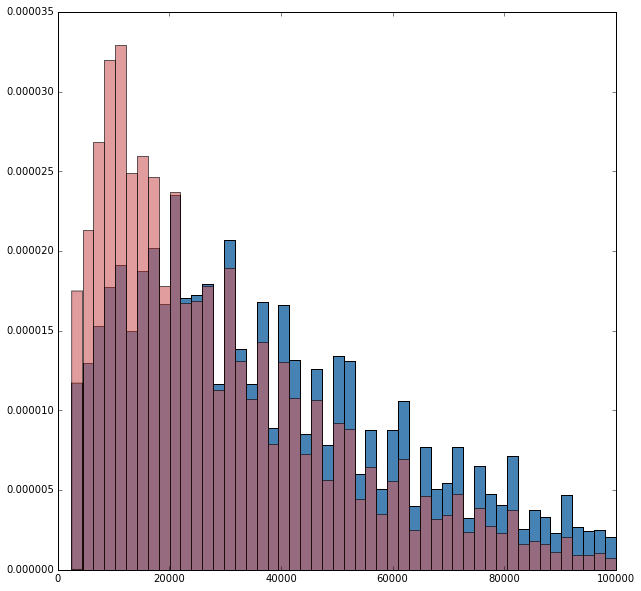

In [23]:
pl.figure(figsize=(10,10))
pl.hist(mocs['males'],normed=True,bins=50,color='SteelBlue')
pl.hist(mocs['females'],normed=True,bins=50,color='IndianRed',alpha=0.6)

In [24]:
from scipy import stats  
      
f_val, p_val = stats.f_oneway(mocs['males'],mocs['females'])  
  
print "One-way ANOVA P =", p_val  
  

One-way ANOVA P = 0.0


Ks_2sampResult(statistic=0.14938290583011055, pvalue=0.0)

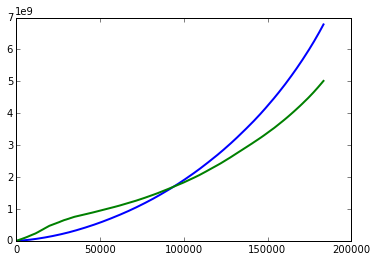

In [27]:
pl.plot(cumsum(mocs['males'][np.argsort(mocs['males'])]),lw=2)
pl.plot(cumsum(mocs['females'][np.argsort(mocs['males'])]),lw=2)
from scipy import stats
stats.ks_2samp(mocs['males'],mocs['females'])

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm



formula = 'S ~ C(E) + C(M) + X'
lm = ols(formula, salary_table).fit()
print lm.summary()